In [4]:
from astropy.io import fits
from os import chdir, getcwd

root = '/Volumes/Git/Master_Thesis/'
chdir(root)

## Load data from FITS files.

#### From optical/UV data

In [5]:

with fits.open('Data/COSMOS/stardust/cosmos.fits') as f:
    optical: fits.hdu.table.BinTableHDU = f[1]
    optical_dict = {line[0]:{'RA':line[1],'DEC':line[2]} for line in optical.data}

In [28]:
for key in optical_dict:
    print(f'{key}: {optical_dict[key]}')

877661: {'RA': 149.98145, 'DEC': 2.2532}
1024221: {'RA': 149.79988, 'DEC': 2.3883955}
911594: {'RA': 149.87718, 'DEC': 2.283875}
832735: {'RA': 150.076, 'DEC': 2.2118278}
1452625: {'RA': 150.43192, 'DEC': 2.802611}
970128: {'RA': 150.23701, 'DEC': 2.33571}
884363: {'RA': 150.27834, 'DEC': 2.258817}
777178: {'RA': 150.33144, 'DEC': 2.162369}
970358: {'RA': 150.23987, 'DEC': 2.33645}
972923: {'RA': 150.23735, 'DEC': 2.33814}


#### From IR data

In [32]:
with fits.open('Data/COSMOS/Super_deblended_photometry_and_A3COSMOS.fits') as f:
    ir: fits.hdu.table.BinTableHDU = f[1]
    ir_dict = {line[0]:{'RA':line[1],'DEC':line[2]} for line in ir.data}
    ir_data = ir.data

#### Plot the RA-DEC

In [7]:
import matplotlib.pyplot as plt

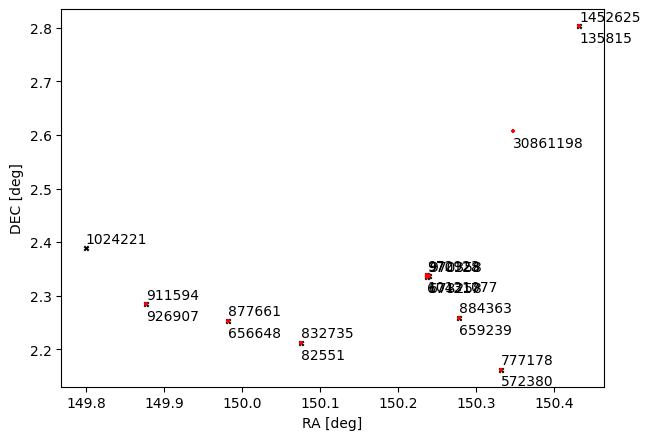

In [9]:
plt.figure(num=1, figsize=(7,5), dpi=100)
# Optical
x = [optical_dict[idx]['RA'] for idx in optical_dict.keys()]
y = [optical_dict[idx]['DEC'] for idx in optical_dict.keys()]
plt.scatter(x, y, s=10, c='k', marker="x")
idx = list(optical_dict.keys())
for i in range(len(idx)):
    plt.annotate(idx[i], (x[i],y[i]+0.01))

# IR
x = [ir_dict[idx]['RA'] for idx in ir_dict.keys()]
y = [ir_dict[idx]['DEC'] for idx in ir_dict.keys()]
plt.scatter(x, y, s=10, c='r', marker="+")
idx = list(ir_dict.keys())
for i in range(len(idx)):
    plt.annotate(idx[i], (x[i],y[i]-0.03))

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

plt.show()

In [30]:
id_map = {
    926907: 911594,
    656648: 877661,
    82551: 832735,
    572380: 777178,
    659239: 884363,
    30861198: None,
    135815: 1452625,
    674217: 970128,
    673258: 970358,
    10131077: 972923
}
'''Link the IDs from the deblended fits file to the IDs of the spec files.'''

'Link the IDs from the deblended fits file to the IDs of the spec files.'

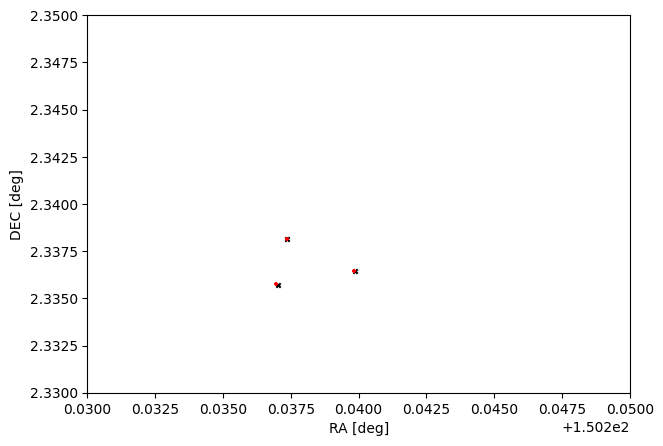

Optical: 970128, {'RA': 150.23701, 'DEC': 2.33571}

IR: 673258, {'RA': 150.23983975651996, 'DEC': 2.3364562288963127}

Optical: 970358, {'RA': 150.23987, 'DEC': 2.33645}

IR: 674217, {'RA': 150.23693814630735, 'DEC': 2.3357378918662595}

Optical: 972923, {'RA': 150.23735, 'DEC': 2.33814}

IR: 10131077, {'RA': 150.23735, 'DEC': 2.3381379}



In [29]:
plt.figure(num=2, figsize=(7,5), dpi=100)
# Optical
x = [optical_dict[idx]['RA'] for idx in optical_dict.keys()]
y = [optical_dict[idx]['DEC'] for idx in optical_dict.keys()]
plt.scatter(x, y, s=10, c='k', marker="x")
idx = list(optical_dict.keys())

# IR
x = [ir_dict[idx]['RA'] for idx in ir_dict.keys()]
y = [ir_dict[idx]['DEC'] for idx in ir_dict.keys()]
plt.scatter(x, y, s=10, c='r', marker="+")
idx = list(ir_dict.keys())

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.xlim([150.23,150.25])
plt.ylim([2.33,2.35])

plt.show()

id_opt = [idx for idx in optical_dict.keys() if optical_dict[idx]['RA'] > 150.23 and optical_dict[idx]['RA'] < 150.25]
id_ir = [idx for idx in ir_dict.keys() if ir_dict[idx]['RA'] > 150.23 and ir_dict[idx]['RA'] < 150.25]
for i in range(len(id_opt)):
    print(f'Optical: {id_opt[i]}, {optical_dict[id_opt[i]]}\n')
    print(f'IR: {id_ir[i]}, {ir_dict[id_ir[i]]}\n')


In [31]:
for key in ir_dict:
    print(f'IR {key} -> Optical {id_map[key]}')

IR 82551 -> Optical 832735
IR 135815 -> Optical 1452625
IR 572380 -> Optical 777178
IR 656648 -> Optical 877661
IR 659239 -> Optical 884363
IR 673258 -> Optical 970358
IR 674217 -> Optical 970128
IR 926907 -> Optical 911594
IR 10131077 -> Optical 972923
IR 30861198 -> Optical None


In [ ]:
from astropy import units as U
funit = {
    'f24': U.mJy,
    'f100': U.uJy,
    'f160': U.uJy,
    'f250': U.uJy,
    'f850': U.uJy,
    'f870': U.uJy,  
    'f1000': U.uJy,
    'f1250': U.uJy,
    'f3000': U.uJy,
    'f10cm': U.mJy,
    'f20cm': U.mJy,
    'f23cm': U.mJy,
}

λ = {
    'f24': 24*U.um,
    'f100': 100*U.um,
    'f160': 160*U.um,
    'f250': 250*U.um,
    'f850': 850*U.um,
    'f870': 870*U.um,  
    'f1000': 1000*U.um,
    'f1250': 1250*U.um,
    'f3000': 3000*U.um,
    'f10cm': 10*U.cm,
    'f20cm': 20*U.cm,
    'f23cm': 23*U.cm,
}
for line in ir_data:
    idx = id_map(line[0]),
    obs = {
        'f24': line[15] * U.mJy,
        'f100': line[17] * U.uJy,
        'f160': line[19] * U.uJy,
        'f250': line[21] * U.uJy,
        # SCUBA2
        'f850': line[23] * U.uJy,
        # ALMA
        'f870': line[25] * U.uJy,  
        'f1000': line[27] * U.uJy,
        'f1250': line[29] * U.uJy,
        'f3000': line[31] * U.uJy,
        # VLA
        'f10cm': line[33] * U.mJy,
        'f20cm': line[35] * U.mJy,
        # Meerkat
        'f23cm': line[37] * U.mJy,
    }

    err = {
        'f24': line[16],
        'f100': line[18],
        'f160': line[20],
        'f250': line[22],
        'f850': line[24],
        'f870': line[26],
        'f1000': line[28],
        'f1250': line[30],
        'f3000': line[32],
        'f10cm': line[34],
        'f20cm': line[36],
        'f23cm': line[37],
    }